In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import warnings
from sklearn.metrics import silhouette_score
plt.rcParams["figure.figsize"] = (20, 10)
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



In [2]:
df = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\main2.parquet")


In [3]:

def fillna_value():
    z = df
    Mean_Load = df.Mean_Load.mean()
    Max_Load = df.Max_Load.mean()
    Min_Load = df.Min_Load.mean()
    
    df['Mean_Load'].fillna(value=Mean_Load, inplace=True)
    df['Max_Load'].fillna(value=Max_Load, inplace=True)
    df['Min_Load'].fillna(value=Min_Load, inplace=True)
    
    return df

df = fillna_value()

In [4]:
main = df.copy()
main

Time             week_date  Max_Load  Min_Load  Mean_Load  \
0    2022-09-17 12:00:00  2022-09-11 (week 37)    46.666    29.376  37.835000   
1    2022-09-17 13:00:00  2022-09-11 (week 37)    51.045    31.066  43.259552   
2    2022-09-17 14:00:00  2022-09-11 (week 37)    45.432    35.635  40.673883   
3    2022-09-17 15:00:00  2022-09-11 (week 37)    47.489    36.948  43.198733   
4    2022-09-17 16:00:00  2022-09-11 (week 37)    59.146    36.043  46.881117   
...                  ...                   ...       ...       ...        ...   
3271 2023-01-31 19:00:00   2023-01-29 (week 5)    87.146    72.626  79.960733   
3272 2023-01-31 20:00:00   2023-01-29 (week 5)    82.882    70.813  77.210667   
3273 2023-01-31 21:00:00   2023-01-29 (week 5)    76.380    57.502  66.348317   
3274 2023-01-31 22:00:00   2023-01-29 (week 5)    62.340    52.269  57.426000   
3275 2023-01-31 23:00:00   2023-01-29 (week 5)    64.928    35.253  56.462625   

      hour_of_the_week   WeekDay  
0                  133  Saturday  
1                  134  Saturday  
2                  135  Saturday  
3                  136  Saturday  
4                  137  Saturday  
...                ...       ...  
3271                44   Tuesday  
3272                45   Tuesday  
3273                46   Tuesday  
3274                47   Tuesday  
3275                48   Tuesday  

[3276 rows x 7 columns]

In [5]:
df = df[['Time','Mean_Load']]
df
# main = df[['Mean_Load','hour_of_the_week']]

Time  Mean_Load
0    2022-09-17 12:00:00  37.835000
1    2022-09-17 13:00:00  43.259552
2    2022-09-17 14:00:00  40.673883
3    2022-09-17 15:00:00  43.198733
4    2022-09-17 16:00:00  46.881117
...                  ...        ...
3271 2023-01-31 19:00:00  79.960733
3272 2023-01-31 20:00:00  77.210667
3273 2023-01-31 21:00:00  66.348317
3274 2023-01-31 22:00:00  57.426000
3275 2023-01-31 23:00:00  56.462625

[3276 rows x 2 columns]

In [6]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

In [7]:
df

Mean_Load
Time                          
2022-09-17 12:00:00  37.835000
2022-09-17 13:00:00  43.259552
2022-09-17 14:00:00  40.673883
2022-09-17 15:00:00  43.198733
2022-09-17 16:00:00  46.881117
...                        ...
2023-01-31 19:00:00  79.960733
2023-01-31 20:00:00  77.210667
2023-01-31 21:00:00  66.348317
2023-01-31 22:00:00  57.426000
2023-01-31 23:00:00  56.462625

[3276 rows x 1 columns]

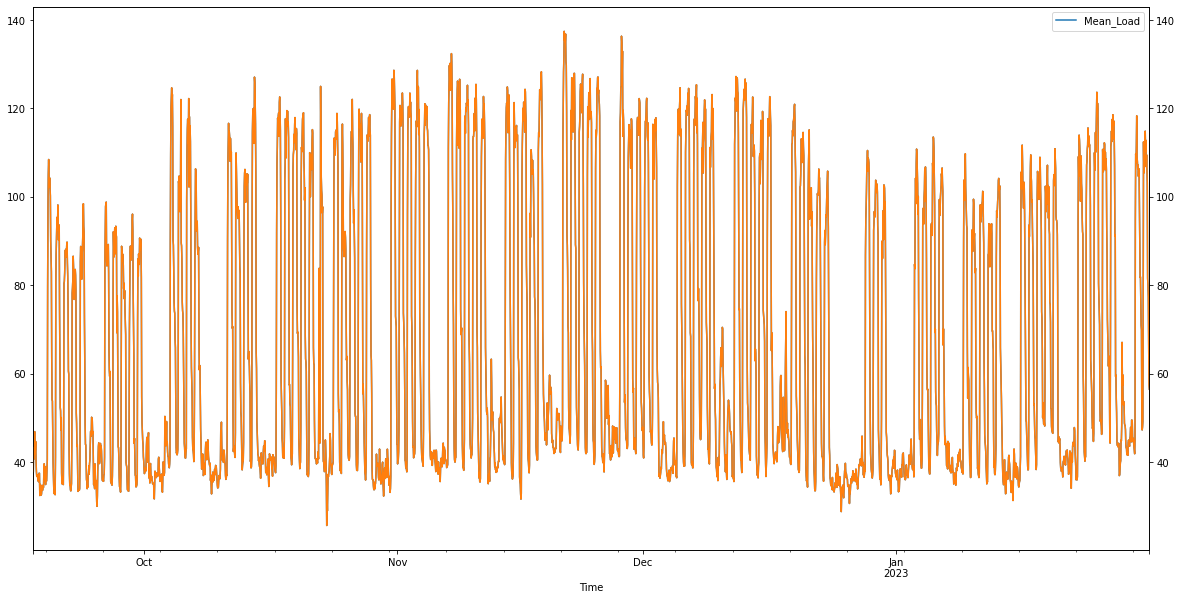

In [8]:
# plt.figure(figsize=(100,20))

df.plot()
df.Mean_Load.plot(secondary_y=True, label="open")

plt.show()

In [9]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

cf.go_offline()

In [10]:
# df.iplot(kind='line', x='Time',y='Mean_Load',title= 'Distribution by hours')

In [11]:
series = df.to_numpy()

In [12]:
series

array([[37.835     ],
       [43.25955172],
       [40.67388333],
       ...,
       [66.34831667],
       [57.426     ],
       [56.462625  ]])

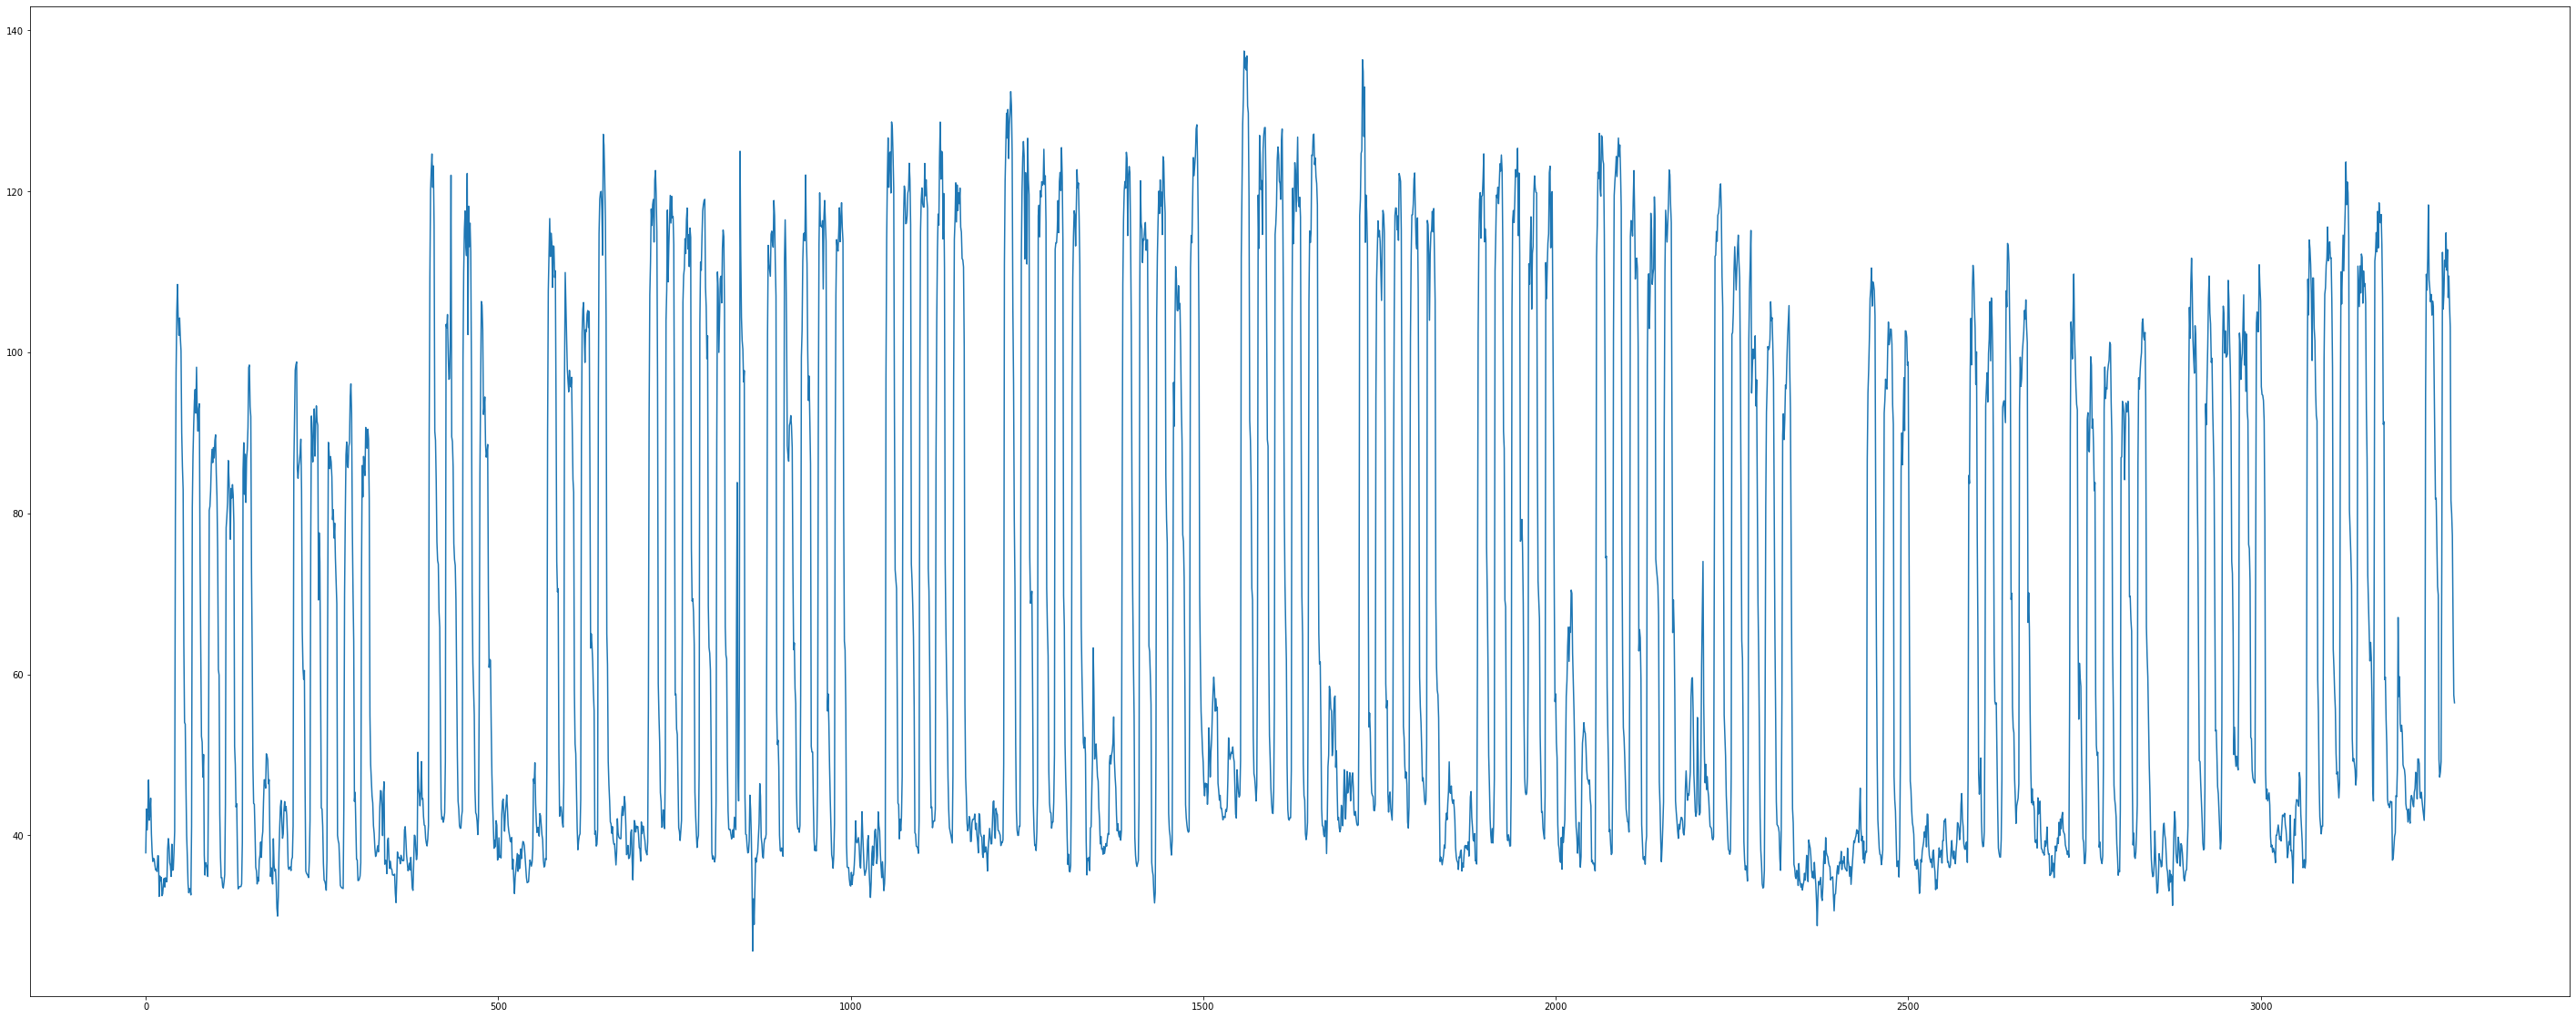

In [13]:
plt.rcParams["figure.figsize"] = (50, 20)

plt.plot(series)

In [14]:
! pip install dtaidistance

In [15]:
!pip install dtw-python

#### Hierarchical clustering 

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
100%|█████████████████████████████████████████████████████████████████████████████▉| 3275/3276 [01:47<00:00, 28.92it/s]DTAIDistance C-extension for Numpy is not available. Proceeding anyway.

  7%|█████▊                                                                         | 240/3276 [00:07<01:42, 29.54it/s]


 15%|███████████▊                                                                   | 491/3276 [00:16<01:26, 32.05it/s]


 23%|██████████████████▏                                                            | 754/3276 [00:24<01:24, 29.99it/s]


 31%|████████████████████████                                                      | 1012/3276 [00:33<01:17, 29.20it/s]


 39%|██████████████████████████████▎                                               | 1272/3276 [00:41<01:03, 31.66it/s]


 47%|████████████████████████████████████▌                                         | 1533/3276 [00:50<00:58, 29.66it/s]


 55%|██████████████████████████████████████████▌                                   | 1790/3276 [00:58<00:49, 29.97it/s]


 62%|████████████████████████████████████████████████▌                             | 2040/3276 [01:06<00:44, 28.01it/s]


 70%|██████████████████████████████████████████████████████▌                       | 2292/3276 [01:15<00:36, 26.68it/s]


 78%|████████████████████████████████████████████████████████████▋                 | 2547/3276 [01:23<00:23, 30.76it/s]


 85%|██████████████████████████████████████████████████████████████████▋           | 2800/3276 [01:32<00:15, 31.54it/s]


 93%|████████████████████████████████████████████████████████████████████████▊     | 3058/3276 [01:40<00:06, 31.64it/s]


100%|█████████████████████████████████████████████████████████████████████████████▉| 3275/3276 [01:47<00:00, 30.48it/s]


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

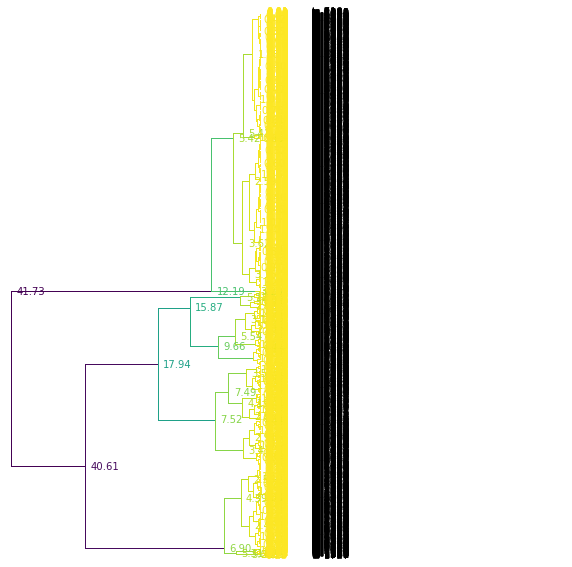

In [16]:
# from dtaidistance import clustering
# model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
# cluster_idx = model1.fit(series)
# model2 = clustering.HierarchicalTree(model1)
# cluster_idx = model2.fit(series)
# # Let’s plot this clustering.

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (50, 20)
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
# show_ts_label = lambda idx: "ts-" + str(idx)
# model2.plot(axes=ax, show_ts_label=show_ts_label,
#            show_tr_label=True, ts_label_margin=-10,
#            ts_left_margin=10, ts_sample_length=1)


from dtaidistance import dtw
from dtaidistance import clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(series)
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)
# Let’s plot this clustering.

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 20)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model2.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

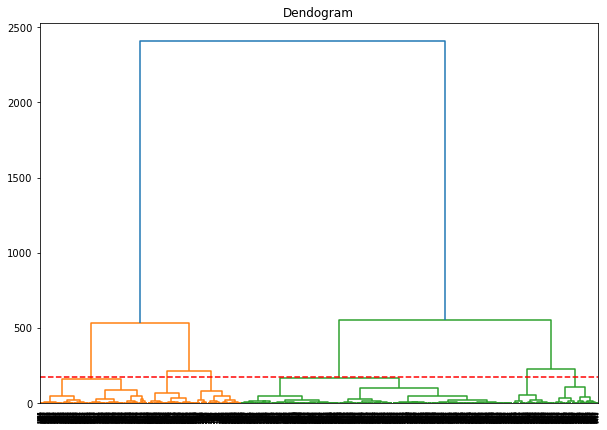

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

# # Compute linkage matrix using complete linkage method
# Z = linkage(series, method='complete')

# # Plot dendrogram
# plt.figure(figsize=(20, 10))
# dendrogram(Z)
# plt.show()

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(series,method='ward'))
plt.axhline(y=175, color='r', linestyle='--')


In [18]:
unique_colors = set(dend['color_list'])
print(unique_colors)
len(unique_colors)-1

{'C1', 'C0', 'C2'}


2

#### Linkage clustering 

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

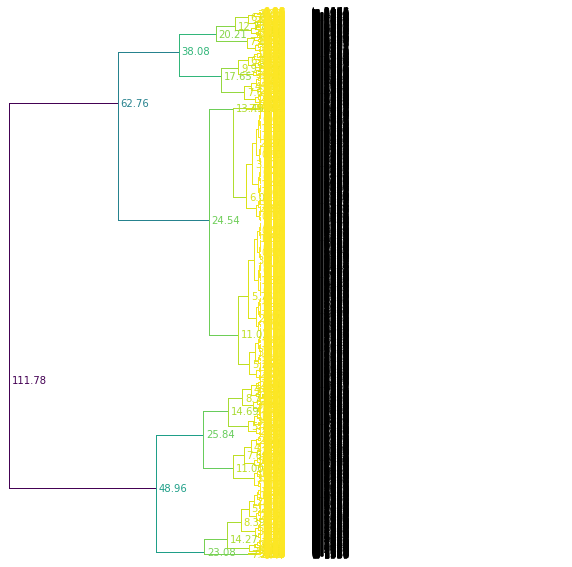

In [19]:
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)
# Let’s plot the clusters.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model3.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

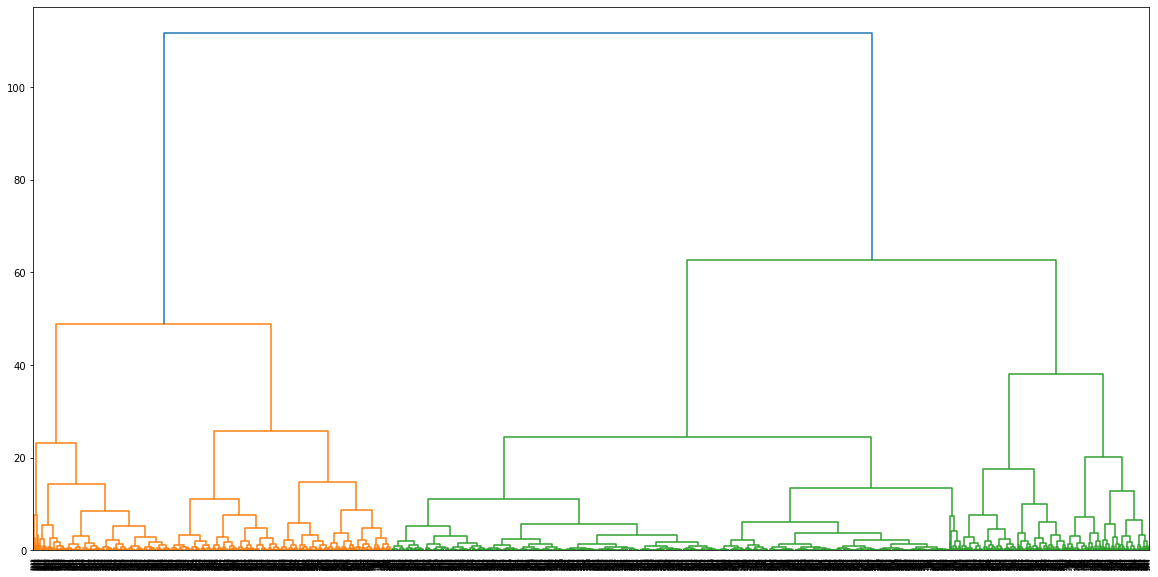

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


In [20]:
from dtaidistance import clustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage matrix using complete linkage method
Z = linkage(series, method='complete')

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)

# Let's plot the clusters and dendrogram
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# show_ts_label = lambda idx: "ts-" + str(idx)
# model3.plot(axes=ax[0], show_ts_label=show_ts_label,
#             show_tr_label=True, ts_label_margin=-10,
#             ts_left_margin=10, ts_sample_length=1)
# ax[1].set_title("Dendrogram")
# dendrogram(Z, ax=ax[1])
# # # Get unique colors used in the dendrogram
# # unique_colors = []
# # for line in ax[1].get_lines():
# #     color = line.get_color()
# #     if color not in unique_colors:
# #         unique_colors.append(color)
# # ax[2].axis("off")
# # ax[2].text(0, 0.5, "Unique colors in the dendrogram:\n" + str(unique_colors))
# plt.show()


In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Assuming you have your data in a numpy array called "data"
# Each row of the data array represents a data point
# The number of columns in the data array represents the number of features

# Create an instance of the AgglomerativeClustering class
clustering_model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward',)

# Fit the model to the data
predict = clustering_model.fit_predict(df)

predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
main['linkage'] = predict

In [23]:
main

Time             week_date  Max_Load  Min_Load  Mean_Load  \
0    2022-09-17 12:00:00  2022-09-11 (week 37)    46.666    29.376  37.835000   
1    2022-09-17 13:00:00  2022-09-11 (week 37)    51.045    31.066  43.259552   
2    2022-09-17 14:00:00  2022-09-11 (week 37)    45.432    35.635  40.673883   
3    2022-09-17 15:00:00  2022-09-11 (week 37)    47.489    36.948  43.198733   
4    2022-09-17 16:00:00  2022-09-11 (week 37)    59.146    36.043  46.881117   
...                  ...                   ...       ...       ...        ...   
3271 2023-01-31 19:00:00   2023-01-29 (week 5)    87.146    72.626  79.960733   
3272 2023-01-31 20:00:00   2023-01-29 (week 5)    82.882    70.813  77.210667   
3273 2023-01-31 21:00:00   2023-01-29 (week 5)    76.380    57.502  66.348317   
3274 2023-01-31 22:00:00   2023-01-29 (week 5)    62.340    52.269  57.426000   
3275 2023-01-31 23:00:00   2023-01-29 (week 5)    64.928    35.253  56.462625   

      hour_of_the_week   WeekDay  linkage  
0                  133  Saturday        0  
1                  134  Saturday        0  
2                  135  Saturday        0  
3                  136  Saturday        0  
4                  137  Saturday        0  
...                ...       ...      ...  
3271                44   Tuesday        1  
3272                45   Tuesday        0  
3273                46   Tuesday        0  
3274                47   Tuesday        0  
3275                48   Tuesday        0  

[3276 rows x 8 columns]

No handles with labels found to put in legend.


The average Silhouette Score is : 0.7833473089887869
The average davies_bouldin Score is : 0.30007122904494177
The average calinski_harabasz Score is : 23265.262928407705


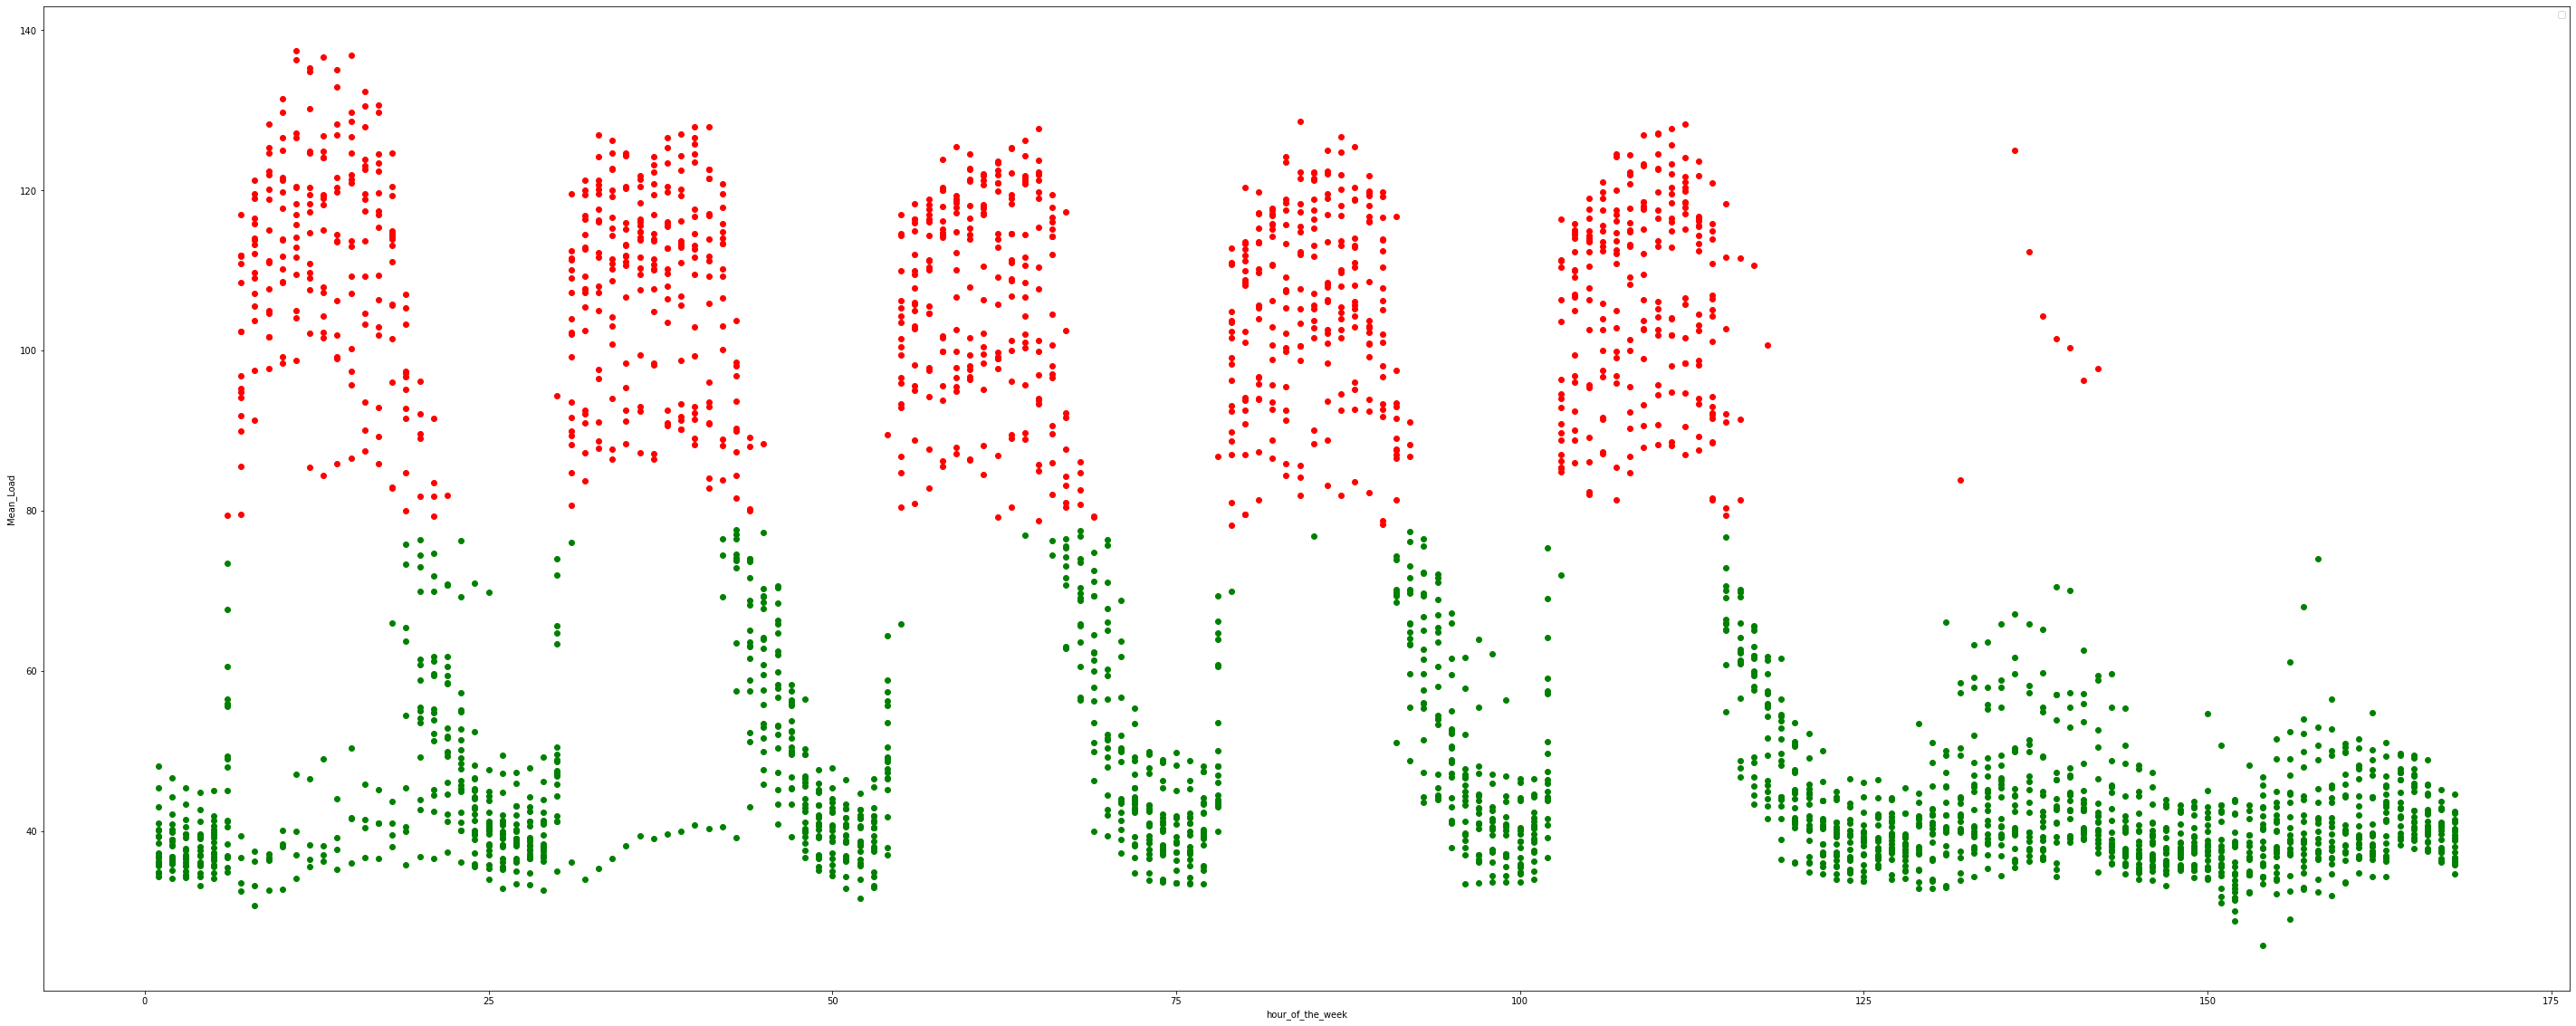

In [24]:
# df['linkage'] = y_predict
df1 = main[main.linkage==0]
df2 = main[main.linkage==1]
df3 = main[main.linkage==2]


plt.scatter(df1.hour_of_the_week, df1['Mean_Load'], color='green')
plt.scatter(df2.hour_of_the_week, df2['Mean_Load'], color='red')
plt.scatter(df3.hour_of_the_week, df3['Mean_Load'], color='black')


plt.xlabel('hour_of_the_week')
plt.ylabel('Mean_Load')
plt.legend()

silhouette_avg = silhouette_score(series,predict)
print("The average Silhouette Score is :", silhouette_avg)

davies_bouldin = davies_bouldin_score(series,predict)
print("The average davies_bouldin Score is :", davies_bouldin)

calinski_harabasz = calinski_harabasz_score(series,predict)
print("The average calinski_harabasz Score is :", calinski_harabasz)



#### K-means clustering 

{}
4.035699999999984


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.06s/it]


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

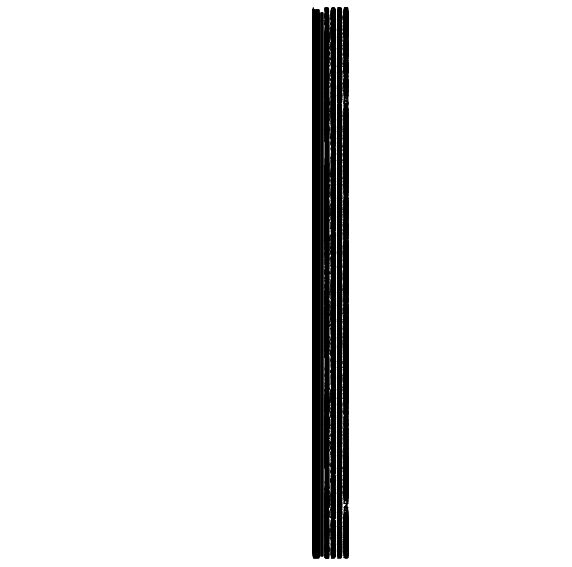

In [25]:
from dtaidistance.clustering import kmeans
model4 = kmeans.KMeans(k=10)
cluster_idx, performed_it = model4.fit(series)
# Here we have used 10 centers to make clusters using k-means clustering. Let’s plot the clusters.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model4.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)


#### K-Medoids clustering 

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


(<Figure size 3600x1440 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

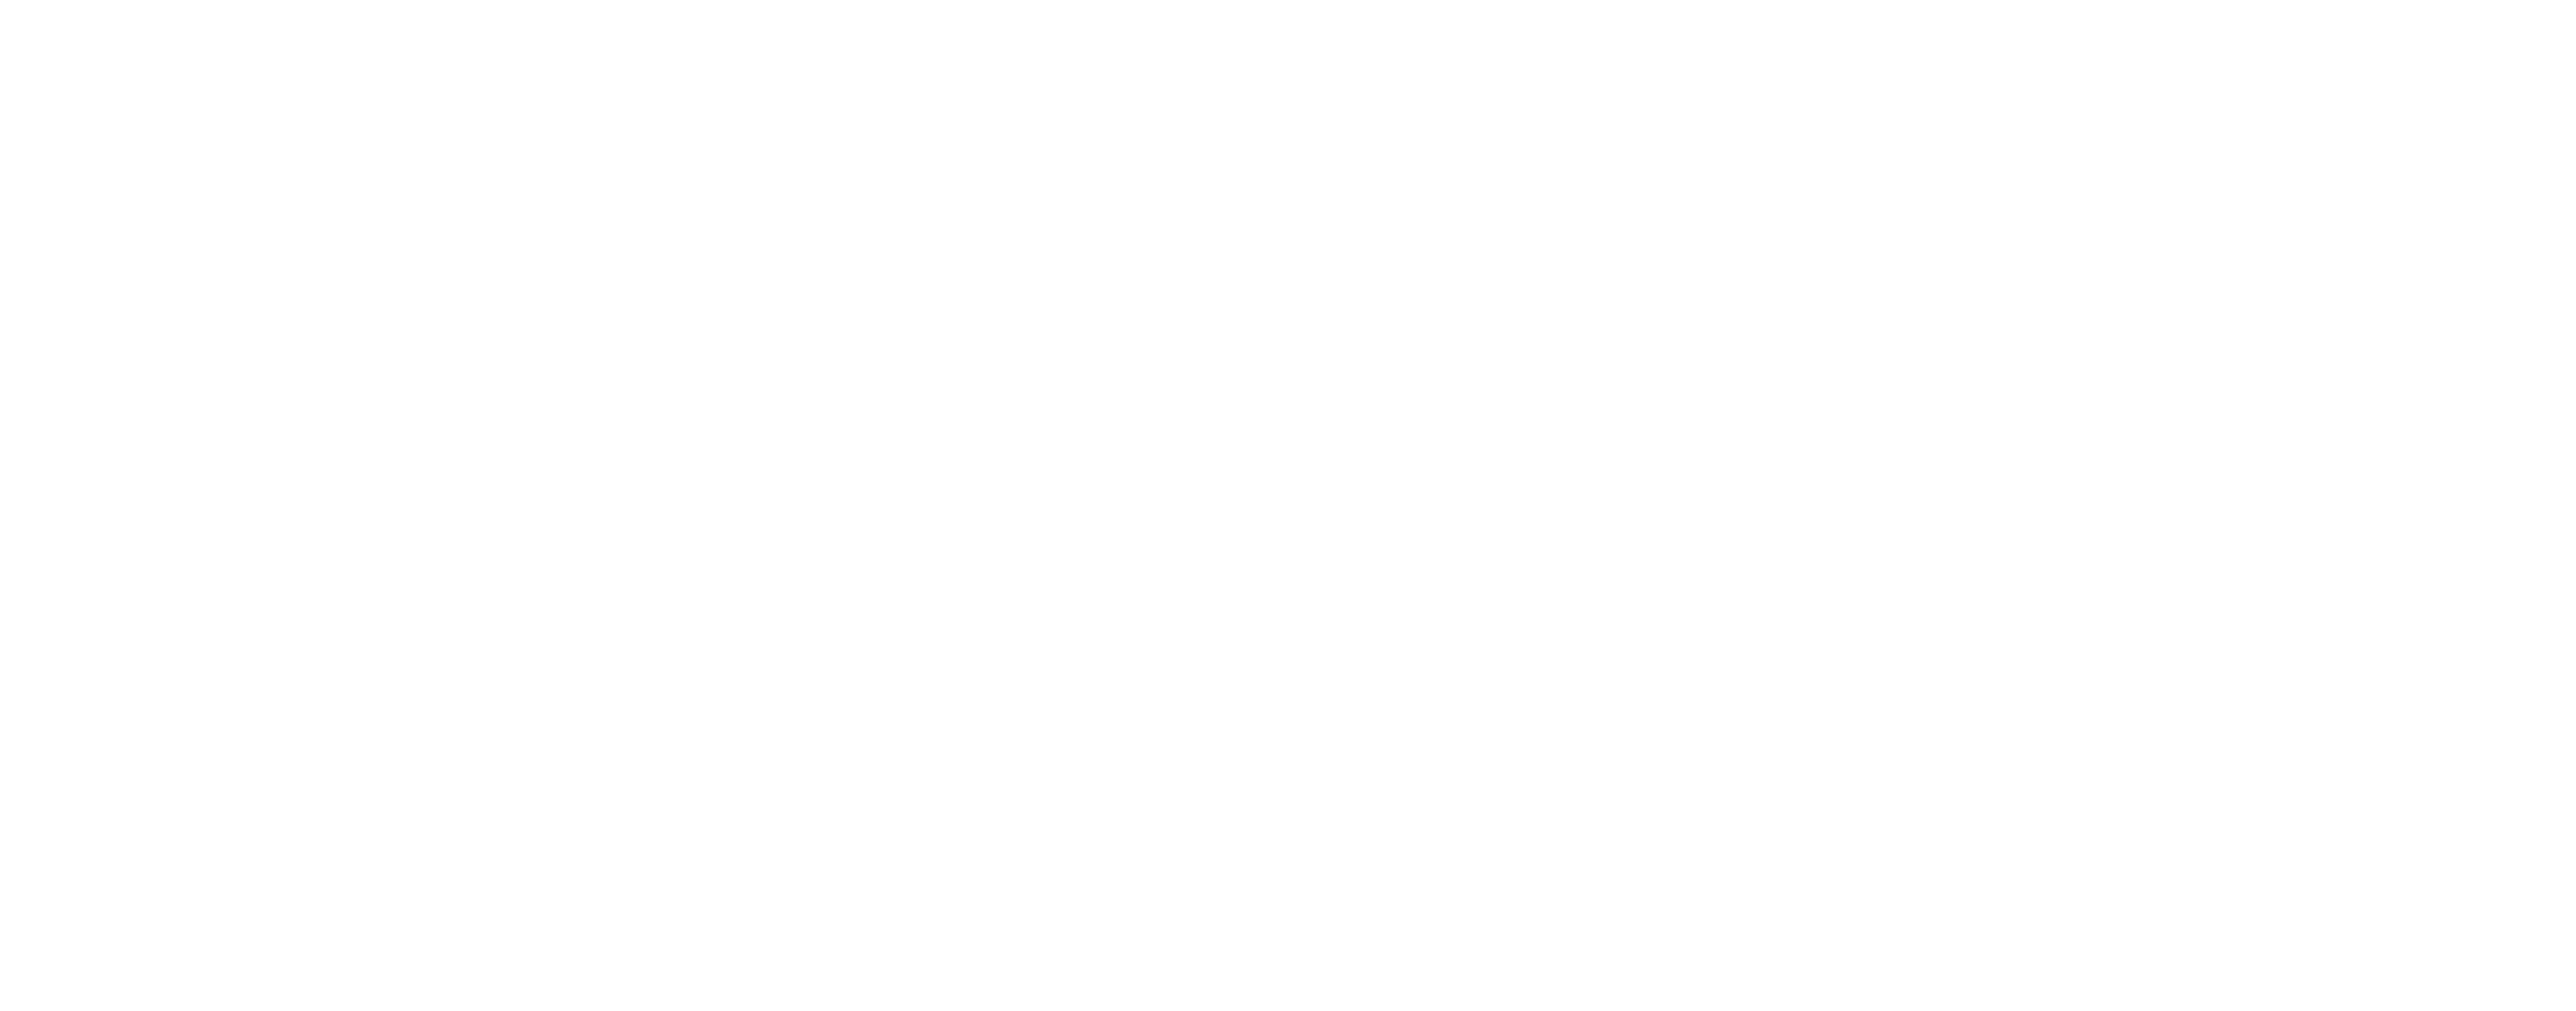

In [26]:
from dtaidistance import dtw, clustering
 
model5 = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=10)
cluster_idx = model5.fit(series)
# Let’s plot the clusters.

model5.plot()

In [27]:
# !pip install PyClustering 

In [28]:
# import scipy.cluster.hierarchy as shc
# plt.figure(figsize=(10,7))
# plt.title("Dendogram")
# dend = shc.dendrogram(shc.linkage(series,method='ward'))
# plt.axhline(y=175, color='r', linestyle='--')

### CLUSTER ANALYSIS

In [29]:
# main.to_csv('cluster_analysis.csv', index=False)
# main= pd.read_csv('cluster_analysis.csv')
main

Time             week_date  Max_Load  Min_Load  Mean_Load  \
0    2022-09-17 12:00:00  2022-09-11 (week 37)    46.666    29.376  37.835000   
1    2022-09-17 13:00:00  2022-09-11 (week 37)    51.045    31.066  43.259552   
2    2022-09-17 14:00:00  2022-09-11 (week 37)    45.432    35.635  40.673883   
3    2022-09-17 15:00:00  2022-09-11 (week 37)    47.489    36.948  43.198733   
4    2022-09-17 16:00:00  2022-09-11 (week 37)    59.146    36.043  46.881117   
...                  ...                   ...       ...       ...        ...   
3271 2023-01-31 19:00:00   2023-01-29 (week 5)    87.146    72.626  79.960733   
3272 2023-01-31 20:00:00   2023-01-29 (week 5)    82.882    70.813  77.210667   
3273 2023-01-31 21:00:00   2023-01-29 (week 5)    76.380    57.502  66.348317   
3274 2023-01-31 22:00:00   2023-01-29 (week 5)    62.340    52.269  57.426000   
3275 2023-01-31 23:00:00   2023-01-29 (week 5)    64.928    35.253  56.462625   

      hour_of_the_week   WeekDay  linkage  
0                  133  Saturday        0  
1                  134  Saturday        0  
2                  135  Saturday        0  
3                  136  Saturday        0  
4                  137  Saturday        0  
...                ...       ...      ...  
3271                44   Tuesday        1  
3272                45   Tuesday        0  
3273                46   Tuesday        0  
3274                47   Tuesday        0  
3275                48   Tuesday        0  

[3276 rows x 8 columns]

In [30]:
main_0 = main[main['linkage']==0]
main_1 = main[main['linkage']==1]

In [31]:
print(main_0.describe())

print(" ")
print(main_0['hour_of_the_week'].value_counts())

print(" ")
print(main_0['WeekDay'].value_counts())

          Max_Load     Min_Load    Mean_Load  hour_of_the_week  linkage
count  2095.000000  2095.000000  2095.000000       2095.000000   2095.0
mean     51.202302    37.816892    44.729428         96.646301      0.0
std      14.304891     8.821674    10.051273         51.696939      0.0
min      29.150000    16.472000    25.642433          1.000000      0.0
25%      41.986500    32.579500    37.806475         49.000000      0.0
50%      45.836000    36.273000    41.320883        102.000000      0.0
75%      54.696000    40.625500    47.959733        142.000000      0.0
max     123.086000    73.023000    77.568900        168.000000      0.0
 
167    20
156    20
27     20
25     20
23     20
       ..
37      1
64      1
39      1
41      1
55      1
Name: hour_of_the_week, Length: 138, dtype: int64
 
Sunday       480
Saturday     460
Monday       267
Tuesday      240
Friday       217
Wednesday    216
Thursday     215
Name: WeekDay, dtype: int64


In [32]:
print(main_1.describe())
print(" ")

print(main_1['hour_of_the_week'].value_counts())
print(" ")

print(main_1['WeekDay'].value_counts())

          Max_Load     Min_Load    Mean_Load  hour_of_the_week  linkage
count  1181.000000  1181.000000  1181.000000       1181.000000   1181.0
mean    115.824944    88.733608   106.691706         62.526672      1.0
std      12.333822    24.869620    12.904446         34.127905      0.0
min      83.865000    21.599000    78.195067          6.000000      1.0
25%     107.408000    72.780000    96.434933         35.000000      1.0
50%     117.814000    95.092000   108.861317         62.000000      1.0
75%     125.264000   109.235000   116.944983         89.000000      1.0
max     147.705000   133.064000   137.420250        142.000000      1.0
 
80     19
65     19
41     19
56     19
90     19
       ..
137     1
138     1
139     1
140     1
6       1
Name: hour_of_the_week, Length: 88, dtype: int64
 
Thursday     241
Wednesday    240
Tuesday      240
Friday       239
Monday       213
Saturday       8
Name: WeekDay, dtype: int64


In [33]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

cf.go_offline()

In [34]:
main.iplot(kind='line', x='Time',y='Mean_Load', secondary_y='hour_of_the_week',title= 'Distribution by hours')

In [35]:
main_0.iplot(kind='line', x='Time',y='Mean_Load', secondary_y='hour_of_the_week',title= 'Distribution by hours')

In [36]:
main_1.iplot(kind='line', x='Time',y='Mean_Load', secondary_y='hour_of_the_week',title= 'Distribution by hours')

In [37]:
import plotly.express as px
import pandas

In [38]:
main['linkage'] = main['linkage'].astype('category')

In [39]:
px.scatter(main,x='hour_of_the_week',y='Mean_Load',color='linkage')

In [40]:
px.scatter(main, x='Time',y='Mean_Load',title= 'Distribution by hours',color='linkage')

In [41]:
main

Time             week_date  Max_Load  Min_Load  Mean_Load  \
0    2022-09-17 12:00:00  2022-09-11 (week 37)    46.666    29.376  37.835000   
1    2022-09-17 13:00:00  2022-09-11 (week 37)    51.045    31.066  43.259552   
2    2022-09-17 14:00:00  2022-09-11 (week 37)    45.432    35.635  40.673883   
3    2022-09-17 15:00:00  2022-09-11 (week 37)    47.489    36.948  43.198733   
4    2022-09-17 16:00:00  2022-09-11 (week 37)    59.146    36.043  46.881117   
...                  ...                   ...       ...       ...        ...   
3271 2023-01-31 19:00:00   2023-01-29 (week 5)    87.146    72.626  79.960733   
3272 2023-01-31 20:00:00   2023-01-29 (week 5)    82.882    70.813  77.210667   
3273 2023-01-31 21:00:00   2023-01-29 (week 5)    76.380    57.502  66.348317   
3274 2023-01-31 22:00:00   2023-01-29 (week 5)    62.340    52.269  57.426000   
3275 2023-01-31 23:00:00   2023-01-29 (week 5)    64.928    35.253  56.462625   

      hour_of_the_week   WeekDay linkage  
0                  133  Saturday       0  
1                  134  Saturday       0  
2                  135  Saturday       0  
3                  136  Saturday       0  
4                  137  Saturday       0  
...                ...       ...     ...  
3271                44   Tuesday       1  
3272                45   Tuesday       0  
3273                46   Tuesday       0  
3274                47   Tuesday       0  
3275                48   Tuesday       0  

[3276 rows x 8 columns]

In [42]:
# main_0.iplot(kind='line', x='Time',y='Mean_Load', secondary_y='hour_of_the_week',title= 'Distribution by hours')
# main['linkage'] = main['linkage'].astype('int')
px.line(main, x='Time',y='Mean_Load',title= 'Distribution by hours',color='linkage')

In [43]:
px.line(main,x='hour_of_the_week',y='Mean_Load',color='linkage')

In [44]:
# main['Time'] = pd.to_datetime(main['Time'])
# main.set_index('Time', inplace=True)

In [45]:
# main

In [46]:
# main.reset_index(inplace=True)

main['hour'] = main['Time'].dt.time
main['date'] = main['Time'].dt.date


main

Time             week_date  Max_Load  Min_Load  Mean_Load  \
0    2022-09-17 12:00:00  2022-09-11 (week 37)    46.666    29.376  37.835000   
1    2022-09-17 13:00:00  2022-09-11 (week 37)    51.045    31.066  43.259552   
2    2022-09-17 14:00:00  2022-09-11 (week 37)    45.432    35.635  40.673883   
3    2022-09-17 15:00:00  2022-09-11 (week 37)    47.489    36.948  43.198733   
4    2022-09-17 16:00:00  2022-09-11 (week 37)    59.146    36.043  46.881117   
...                  ...                   ...       ...       ...        ...   
3271 2023-01-31 19:00:00   2023-01-29 (week 5)    87.146    72.626  79.960733   
3272 2023-01-31 20:00:00   2023-01-29 (week 5)    82.882    70.813  77.210667   
3273 2023-01-31 21:00:00   2023-01-29 (week 5)    76.380    57.502  66.348317   
3274 2023-01-31 22:00:00   2023-01-29 (week 5)    62.340    52.269  57.426000   
3275 2023-01-31 23:00:00   2023-01-29 (week 5)    64.928    35.253  56.462625   

      hour_of_the_week   WeekDay linkage      hour        date  
0                  133  Saturday       0  12:00:00  2022-09-17  
1                  134  Saturday       0  13:00:00  2022-09-17  
2                  135  Saturday       0  14:00:00  2022-09-17  
3                  136  Saturday       0  15:00:00  2022-09-17  
4                  137  Saturday       0  16:00:00  2022-09-17  
...                ...       ...     ...       ...         ...  
3271                44   Tuesday       1  19:00:00  2023-01-31  
3272                45   Tuesday       0  20:00:00  2023-01-31  
3273                46   Tuesday       0  21:00:00  2023-01-31  
3274                47   Tuesday       0  22:00:00  2023-01-31  
3275                48   Tuesday       0  23:00:00  2023-01-31  

[3276 rows x 10 columns]

In [74]:

px.scatter(main.sort_values(by='hour'), x='hour',y='Mean_Load',title= 'Distribution by hours',color='linkage', marginal_x='histogram',marginal_y='box')

### Granularity Properties
+ Day


In [48]:
def day_filter(day=str()):
    day = main[main['WeekDay']==day]
    day = day.sort_values(by='hour')
    return day

In [49]:

def date_filter(year=int(), month=int(), day=int()):
    date = main.loc[(main['date'] == datetime.date(year, month, day))]
    date = date.sort_values(by='hour')
    return date

###### Sundays

In [50]:
days = main.WeekDay.unique().tolist()

In [75]:
px.scatter(day_filter('Sunday'), x='hour',y='Mean_Load',title= 'Sunday',color='linkage', marginal_x='histogram',marginal_y='box')

In [79]:
px.line(date_filter(2022,9,18), x='hour',y='Mean_Load',title= 'Sunday (2022,9,18)',color='linkage')

In [80]:
px.scatter(day_filter('Monday'), x='hour',y='Mean_Load',title= 'Monday',color='linkage', marginal_x='histogram',marginal_y='box')

In [54]:
px.line(date_filter(2022,9,19), x='hour',y='Mean_Load',title= 'Monday (2022,9,19)',color='linkage')

In [81]:
px.scatter(day_filter('Tuesday'), x='hour',y='Mean_Load',title= 'Tuesday',color='linkage', marginal_x='histogram',marginal_y='box')


In [56]:
px.line(date_filter(2022,9,20), x='hour',y='Mean_Load',title= 'Tuesday (2022,9,20)',color='linkage')

In [82]:
px.scatter(day_filter('Wednesday'), x='hour',y='Mean_Load',title= 'Wednesday',color='linkage', marginal_x='histogram',marginal_y='box')

In [58]:
px.line(date_filter(2022,9,21), x='hour',y='Mean_Load',title= 'Wednesday (2022,9,21)',color='linkage')

In [83]:
px.scatter(day_filter('Thursday'), x='hour',y='Mean_Load',title= 'Thursday',color='linkage', marginal_x='histogram',marginal_y='box')

In [60]:
px.line(date_filter(2022,9,22), x='hour',y='Mean_Load',title= 'Thursday (2022,9,22)',color='linkage')

In [84]:
px.scatter(day_filter('Friday'), x='hour',y='Mean_Load',title= 'Friday',color='linkage', marginal_x='histogram',marginal_y='box')

In [62]:
px.line(date_filter(2022,9,23), x='hour',y='Mean_Load',title= 'Friday (2022,9,23)',color='linkage')

In [85]:
px.scatter(day_filter('Saturday'), x='hour',y='Mean_Load',title= 'Saturday',color='linkage', marginal_x='histogram',marginal_y='box')

In [64]:
px.line(date_filter(2022,9,24), x='hour',y='Mean_Load',title= 'Saturday (2022,9,24)',color='linkage')